# The Transformation and Accept/Reject (aka. Von Neumann) methods 
Python notebook with exercise on how to generate random numbers following a specific PDF using uniformly distributed random numbers, in this case three different functions, each with their own challenge.

Both the Accept-Reject (Von Neumann) and transformation method should be considered for the problem (or a combination of both!):
- Transformation method (if function can be integrated and then inverted).
- Accept-Reject (or Hit & Miss) method (by Ulam Stanislav and John Von Neumann).

### References:
- G. Cowan: Chapter 3
- P. R. Bevington: page 81-84
- __[40. Monte Carlo Techniques PDG](https://pdg.lbl.gov/2023/reviews/rpp2023-rev-monte-carlo-techniques.pdf)__

### Authors: 
- Troels C. Petersen (Niels Bohr Institute)

### Date:    
- 04-12-2023 (latest update)

***

In [1]:
import numpy as np                                     # Matlab like syntax for linear algebra and functions
import matplotlib.pyplot as plt                        # Plots and figures like you know them from Matlab
import seaborn as sns                                  # Make the plots nicer to look at
from iminuit import Minuit                             # The actual fitting tool, better than scipy's
import sys                                             # Modules to see files and folders in directories
from scipy import stats

Load external functions:

In [2]:
sys.path.append('../../AppStat2023/External_Functions')
from ExternalFunctions import Chi2Regression, BinnedLH, UnbinnedLH
from ExternalFunctions import nice_string_output, add_text_to_ax    # Useful functions to print fit results on figure

plt.rcParams['font.size'] = 18     # Set some basic plotting parameters

Set the parameters of the program:

In [3]:
r = np.random
r.seed(42)

save_plots = False  
N_points = 10000    # Number of random points to be generated

## Problem 1: 

#### Produce random points following $f(x) \sim \exp(-x/3), x \in [0, \infty]$.

In [4]:
# Define a reasonable range to plot in:
xmin = 0
xmax = 8
N_bins = 100

First I normalize the function:

$$1 = \int_0^\infty n \exp{(-\frac{x}{3})} = 3n$$

So:

$$n=\frac{1}{3}$$

In [5]:
# f(x):
def f_exp(x) :
    k = (xmax - xmin) / N_bins
    N = N_points * k
    return N * 1/3 * np.exp(-x/3)

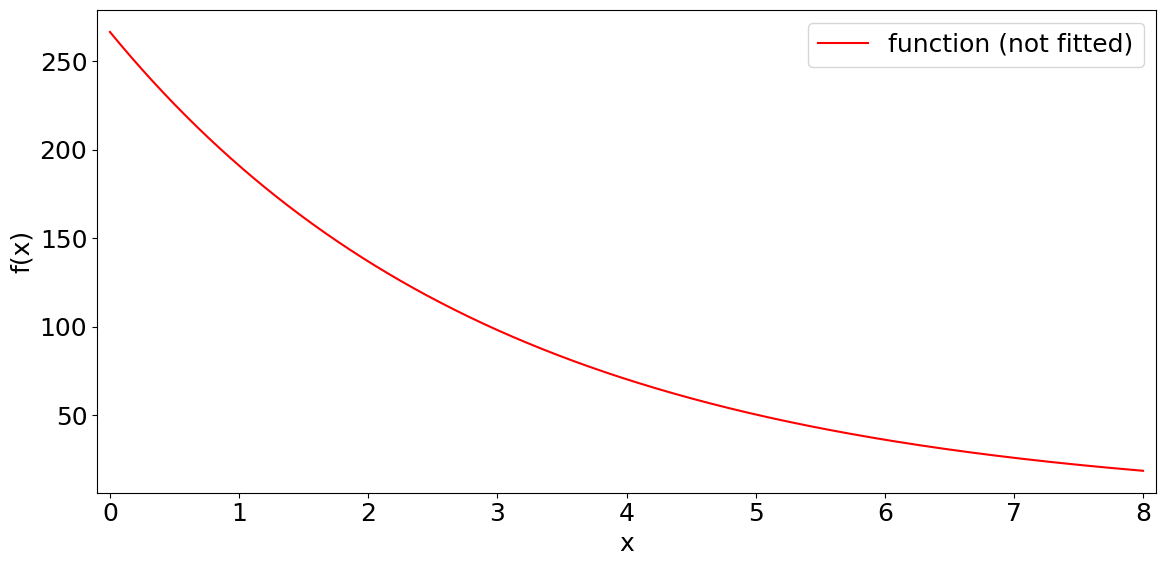

In [6]:
# I start by plotting the function

fig, ax = plt.subplots(figsize=(12, 6))
ax.set(xlabel="x", ylabel="f(x)", xlim=(xmin-0.1, xmax+0.1));

# Plot f(x)
x_axis = np.linspace(xmin, xmax, 1000)
y_axis = f_exp(x_axis)
ax.plot(x_axis, y_axis, 'r-', label='function (not fitted)')

# Add legend
ax.legend(loc='best')
fig.tight_layout()

I can only use the transformation method since the x-range is infinite. So I calculate the transformation:

$$\int_0^x \frac{1}{3} \exp{(-\frac{x}{3})} dx = 1 - \exp{(-\frac{x}{3})} = r$$

$$x(r) = -3 \ln{(1-r)}$$




In [7]:
x_exp = - 3 * np.log(1 - r.uniform(size=N_points))

And to make sure that we have computed the points correctly, we plot a histogram of the data:

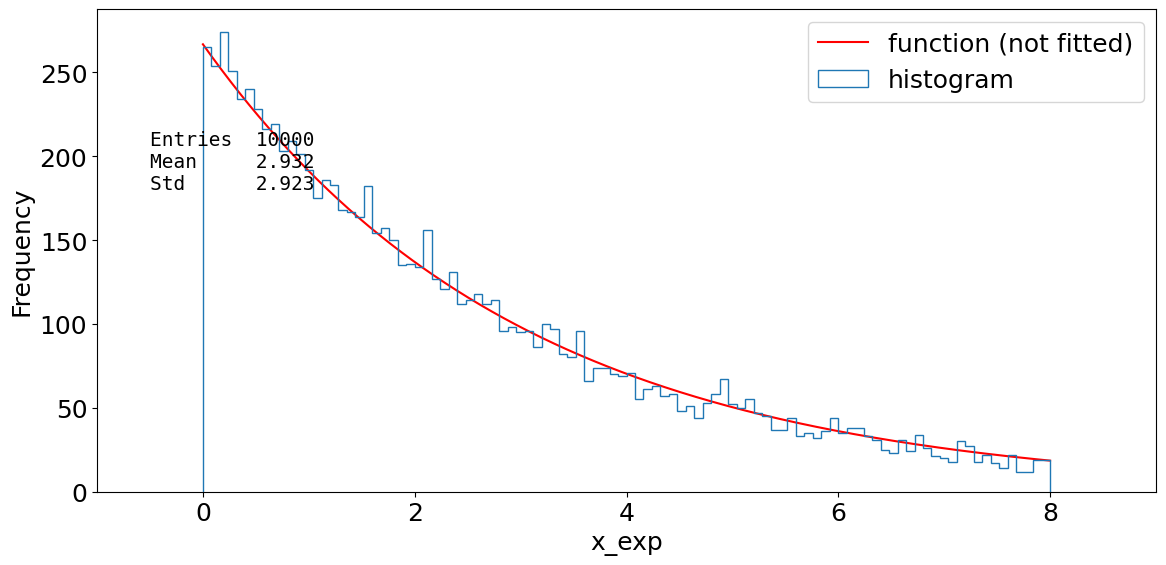

In [8]:
#fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(x_exp, bins=100, range=(xmin, xmax), histtype='step', label='histogram' )
ax.set(xlabel="x_exp", ylabel="Frequency", xlim=(xmin-1.0, xmax+1.0));

# Define figure text
d = {'Entries': len(x_exp),
     'Mean': x_exp.mean(),
     'Std': x_exp.std(ddof=1),
    }

# Plot figure text
text = nice_string_output(d, extra_spacing=2, decimals=3)
add_text_to_ax(0.05, 0.75, text, ax, fontsize=14)

# Add legend
ax.legend(loc='best')
fig.tight_layout()

fig

## Problem 2: 

#### Produce random points following $g(x) \sim x \cos(x), x \in [0, \frac{\pi}{2}]$.

In [9]:
xmin2, xmax2 = 0, np.pi/2         # Note the simple/short notation.

I start by normalizing the distribution (not necessary):

$$1 = \int_0^\frac{\pi}{2} n x \cos{(x)} dx = -n + \frac{1}{2} \pi n$$

$$n = \frac{2}{-2 + \pi}$$

In [10]:
# f(x):
def g_cos(x) :
    k = (xmax2 - xmin2) / N_bins
    N = N_points * k
    return N * 2/(-2 + np.pi) * x * np.cos(x)

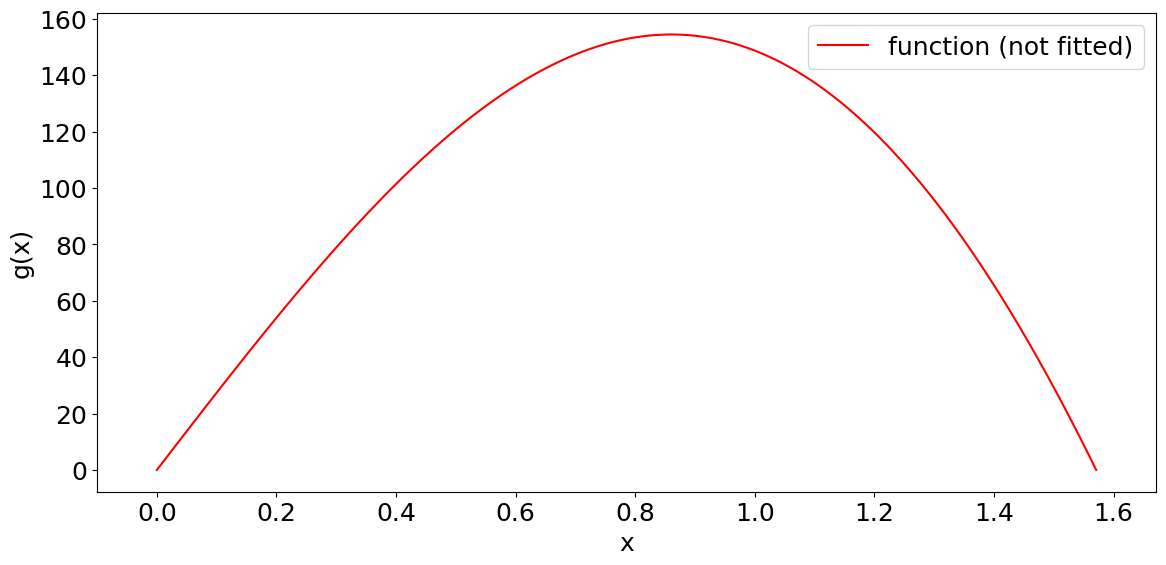

In [11]:
# I start by plotting the function

fig2, ax2 = plt.subplots(figsize=(12, 6))
ax2.set(xlabel="x", ylabel="g(x)", xlim=(xmin2-0.1, xmax2+0.1));

# Plot f(x)
x_axis2 = np.linspace(xmin2, xmax2, 1000)
y_axis2 = g_cos(x_axis2)
ax2.plot(x_axis2, y_axis2, 'r-', label='function (not fitted)')

# Add legend
ax2.legend(loc='best')
fig2.tight_layout()

Since the integrated function cannot be inverted, I have to use the accept-reject method

To do this, I have to know the maximum and minimum value of the function g(x) on the interval. I can see on the plot that the minimum values are given at x_min and x_max where the function is equal to zero. I can also easily deduce this by looking at the expression for the function and seeing that it is zero at $x=0$ and $x=\frac{\pi}{2}$ and larger than zero everywhere else. I find the maximum numerically since I cannot invert the differentiated function analytically.

In [12]:
N_try = 0
ymin2 = 0.0      # Minimum value the function will take!
ymax2 = np.max(2/(-2 + np.pi) * x_axis2 * np.cos(x_axis2))      # Maximum value the function will take!
x_cos = np.zeros(N_points)

for i in range(N_points):
    
    while True:
        
        # Count the number of tries, to get efficiency/integral
        N_try += 1                    
        
        # Range that f(x) is defined/wanted in:
        x_test = r.uniform(xmin2, xmax2)  
        
        # Upper bound for function values:
        y_test = r.uniform(ymin2, ymax2)
        
        if (y_test < 2/(-2 + np.pi) * x_test * np.cos(x_test)):
            break
            
    x_cos[i] = x_test

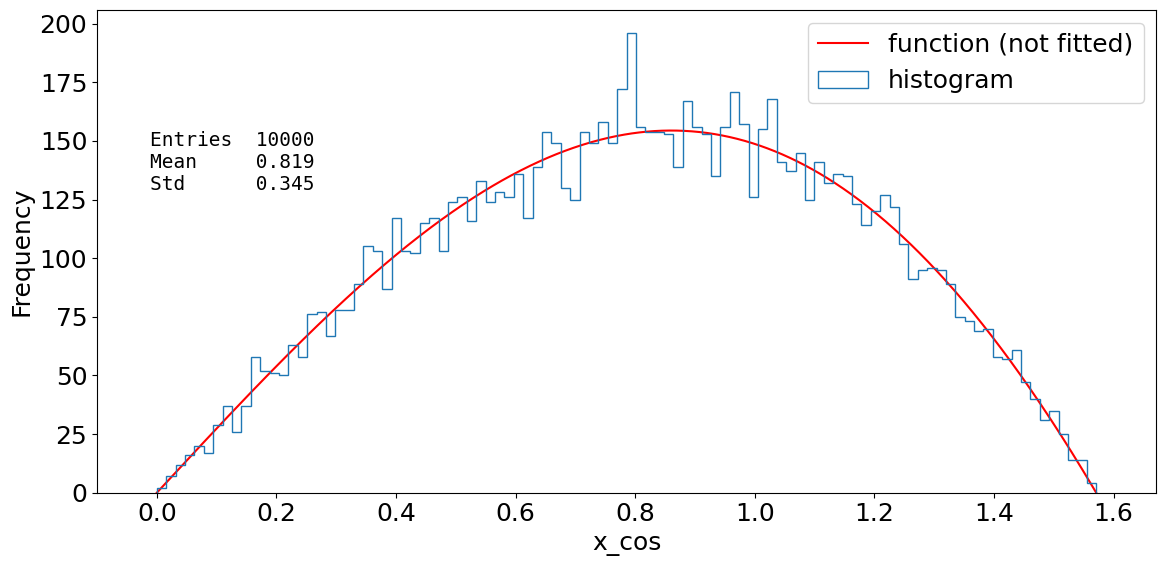

In [13]:
#fig, ax = plt.subplots(figsize=(10, 6))
ax2.hist(x_cos, bins=100, range=(xmin2, xmax2), histtype='step', label='histogram' )
ax2.set(xlabel="x_cos", ylabel="Frequency", xlim=(xmin2-0.1, xmax2+0.1));

# Define figure text
d2 = {'Entries': len(x_cos),
     'Mean': x_cos.mean(),
     'Std': x_cos.std(ddof=1),
    }

# Plot figure text
text = nice_string_output(d2, extra_spacing=2, decimals=3)
add_text_to_ax(0.05, 0.75, text, ax2, fontsize=14)

# Add legend
ax2.legend(loc='best')
fig2.tight_layout()

fig2

## Problem 3: 

#### Produce random points following $h(x) \sim \exp(-x/3)\cos(x)^2$ in the interval $[0, \infty]$ and estimate the integral of $h(x)$ in the defined range.

In [14]:
xmin3, xmax3 = 0, 20

I start by normalizing:

$$1 = \int_0^\infty n \exp{(-\frac{x}{3})} \cos{(x)}^2 dx = \frac{57}{37} n$$

$$n = \frac{37}{57}$$

In [15]:
def h_hist(x):
    k = (xmax3 - xmin3) / N_bins
    N = N_points * k
    return N * 37/57 * np.exp(-x/3) * (np.cos(x))**2

def h(x):
    return 37/57 * np.exp(-x/3) * (np.cos(x))**2

def f(x):
    return 1/3 * np.exp(-x/3)

Here I have to use a combination of transformation and accept-reject since the x-range is neither finite nor can I integrate and invert the function. I start by plotting:

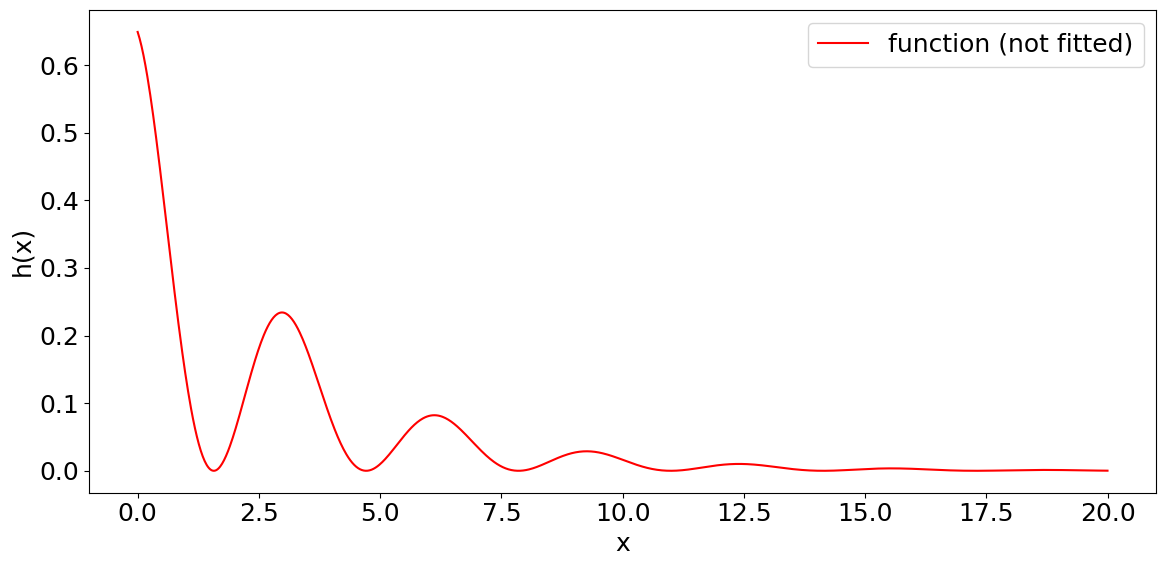

In [16]:
fig3, ax3 = plt.subplots(figsize=(12, 6))
ax3.set(xlabel="x", ylabel="h(x)", xlim=(xmin3-1.0, xmax3+1.0));

# Plot f(x)
x_axis3 = np.linspace(xmin3, xmax3, 1000)
y_axis3 = h(x_axis3)
ax3.plot(x_axis3, y_axis3, 'r-', label='function (not fitted)')

# Add legend
ax3.legend(loc='best')
fig3.tight_layout()

Now I plot f(x) on top of this to see if it encloses g(x). I have to multiply f(x) by 5 to make it enclose h(x).

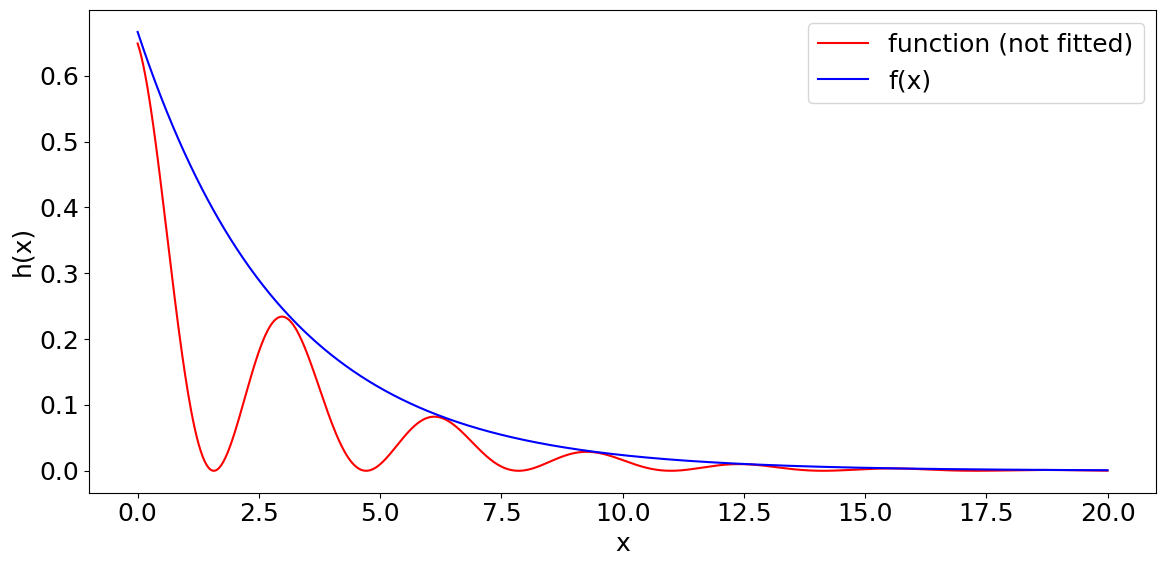

In [17]:
# Plot f(x)
amplitude = 2

x_axis_test = np.linspace(xmin3, xmax3, 1000)
y_axis_test = f(x_axis_test) * amplitude
ax3.plot(x_axis_test, y_axis_test, 'b-', label='f(x)')

ax3.legend(loc='best')

fig3

In [18]:
# I check that h(x) is actually enclosed under f(x)

check = y_axis_test > y_axis3

false_counter = 0

for i in range(len(check)):
    if check[i] == False:
        false_counter += 1

print(f"Number of times f(x) did NOT enclose h(x): {false_counter}")

Number of times f(x) did NOT enclose h(x): 0


Now I am ready to use the reject-accept.

OBS: I multiply f(x) by 5 to make it enclose h(x).

In [19]:
N_try = 0
ymin3 = 0.0      # Minimum value the function will take!
x_h = np.zeros(N_points)

for i in range(N_points):
    
    while True:
        
        # Count the number of tries, to get efficiency/integral
        N_try += 1                    
        
        # Range that f(x) is defined/wanted in:
        x_test = - 3 * np.log(1 - r.uniform())
        
        # Upper bound for function values:
        y_test = r.uniform(ymin3, amplitude*f(x_test))
        
        if (y_test < h(x_test)):
            break
            
    x_h[i] = x_test

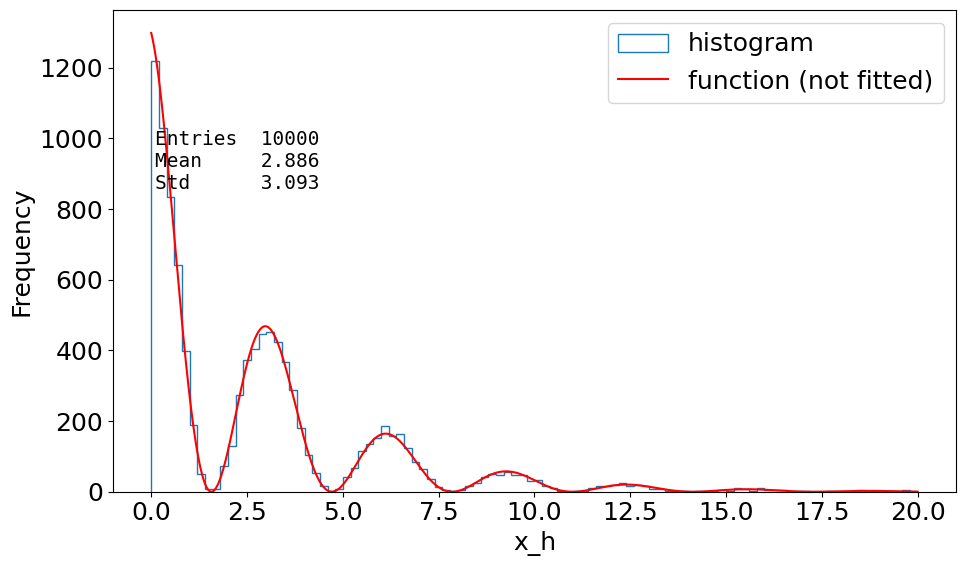

In [20]:
fig4, ax4 = plt.subplots(figsize=(10, 6))
ax4.hist(x_h, bins=100, range=(xmin3, xmax3), histtype='step', label='histogram' )
ax4.plot(x_axis3, h_hist(x_axis3), 'r-', label='function (not fitted)')
ax4.set(xlabel="x_h", ylabel="Frequency", xlim=(xmin3-1.0, xmax3+1.0));

# Define figure text
d4 = {'Entries': len(x_h),
     'Mean': x_h.mean(),
     'Std': x_h.std(ddof=1),
    }

# Plot figure text
text = nice_string_output(d4, extra_spacing=2, decimals=3)
add_text_to_ax(0.05, 0.75, text, ax4, fontsize=14)

# Add legend
ax4.legend(loc='best')
fig4.tight_layout()

Now I am going to estimate the integral of $h(x)$ in the defined range. I know that the integral of $5 f(x)$ is 5 since $f(x)$ is normalized. Therefore, I multiply the efficiency by 5 to estimate the integral under $h(x)$. I expect the integral of $h(x)$ to be 1 since this is also normalized.

In [21]:
# Efficiency
eff = N_points / N_try                        

# Error on efficiency (binomial!)
eff_error = np.sqrt(eff * (1-eff) / N_try) 

# Integral
integral = eff * amplitude

# Error on integral
eintegral = eff_error * amplitude

print(f"The integral under h(x) is {integral:.3f} +- {eintegral:.3f}.")

The integral under h(x) is 1.000 +- 0.007.


# Learning points:

While you should by now be able to solve problem 1+2 with at least one of the methods, problem 3 is harder, and requires the combination of the two. Solving this exercise should make you:
1. "proficient" in using the two standard methods.
2. capable of getting random numbers according to ALL 1D PDFs, bounded/integrable/invertible or not.

The last point of problem 3 should also illustrate, how you can estimate integrals using this method.